In [29]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import cv2



#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28
plt.rcParams['font.family'] = "IPAexGothic"

In [30]:
# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
fname = "../data/火おこし3/"
acc = pd.read_csv(fname+"acc.csv",encoding = 'utf-8')
ans = pd.read_csv(fname+"ans.csv",encoding = 'utf-8')

センシング開始
火を起こし始める
こする
火種を作ろうとする。
こする
火種を作ろうとする。
こする
センシングストップ


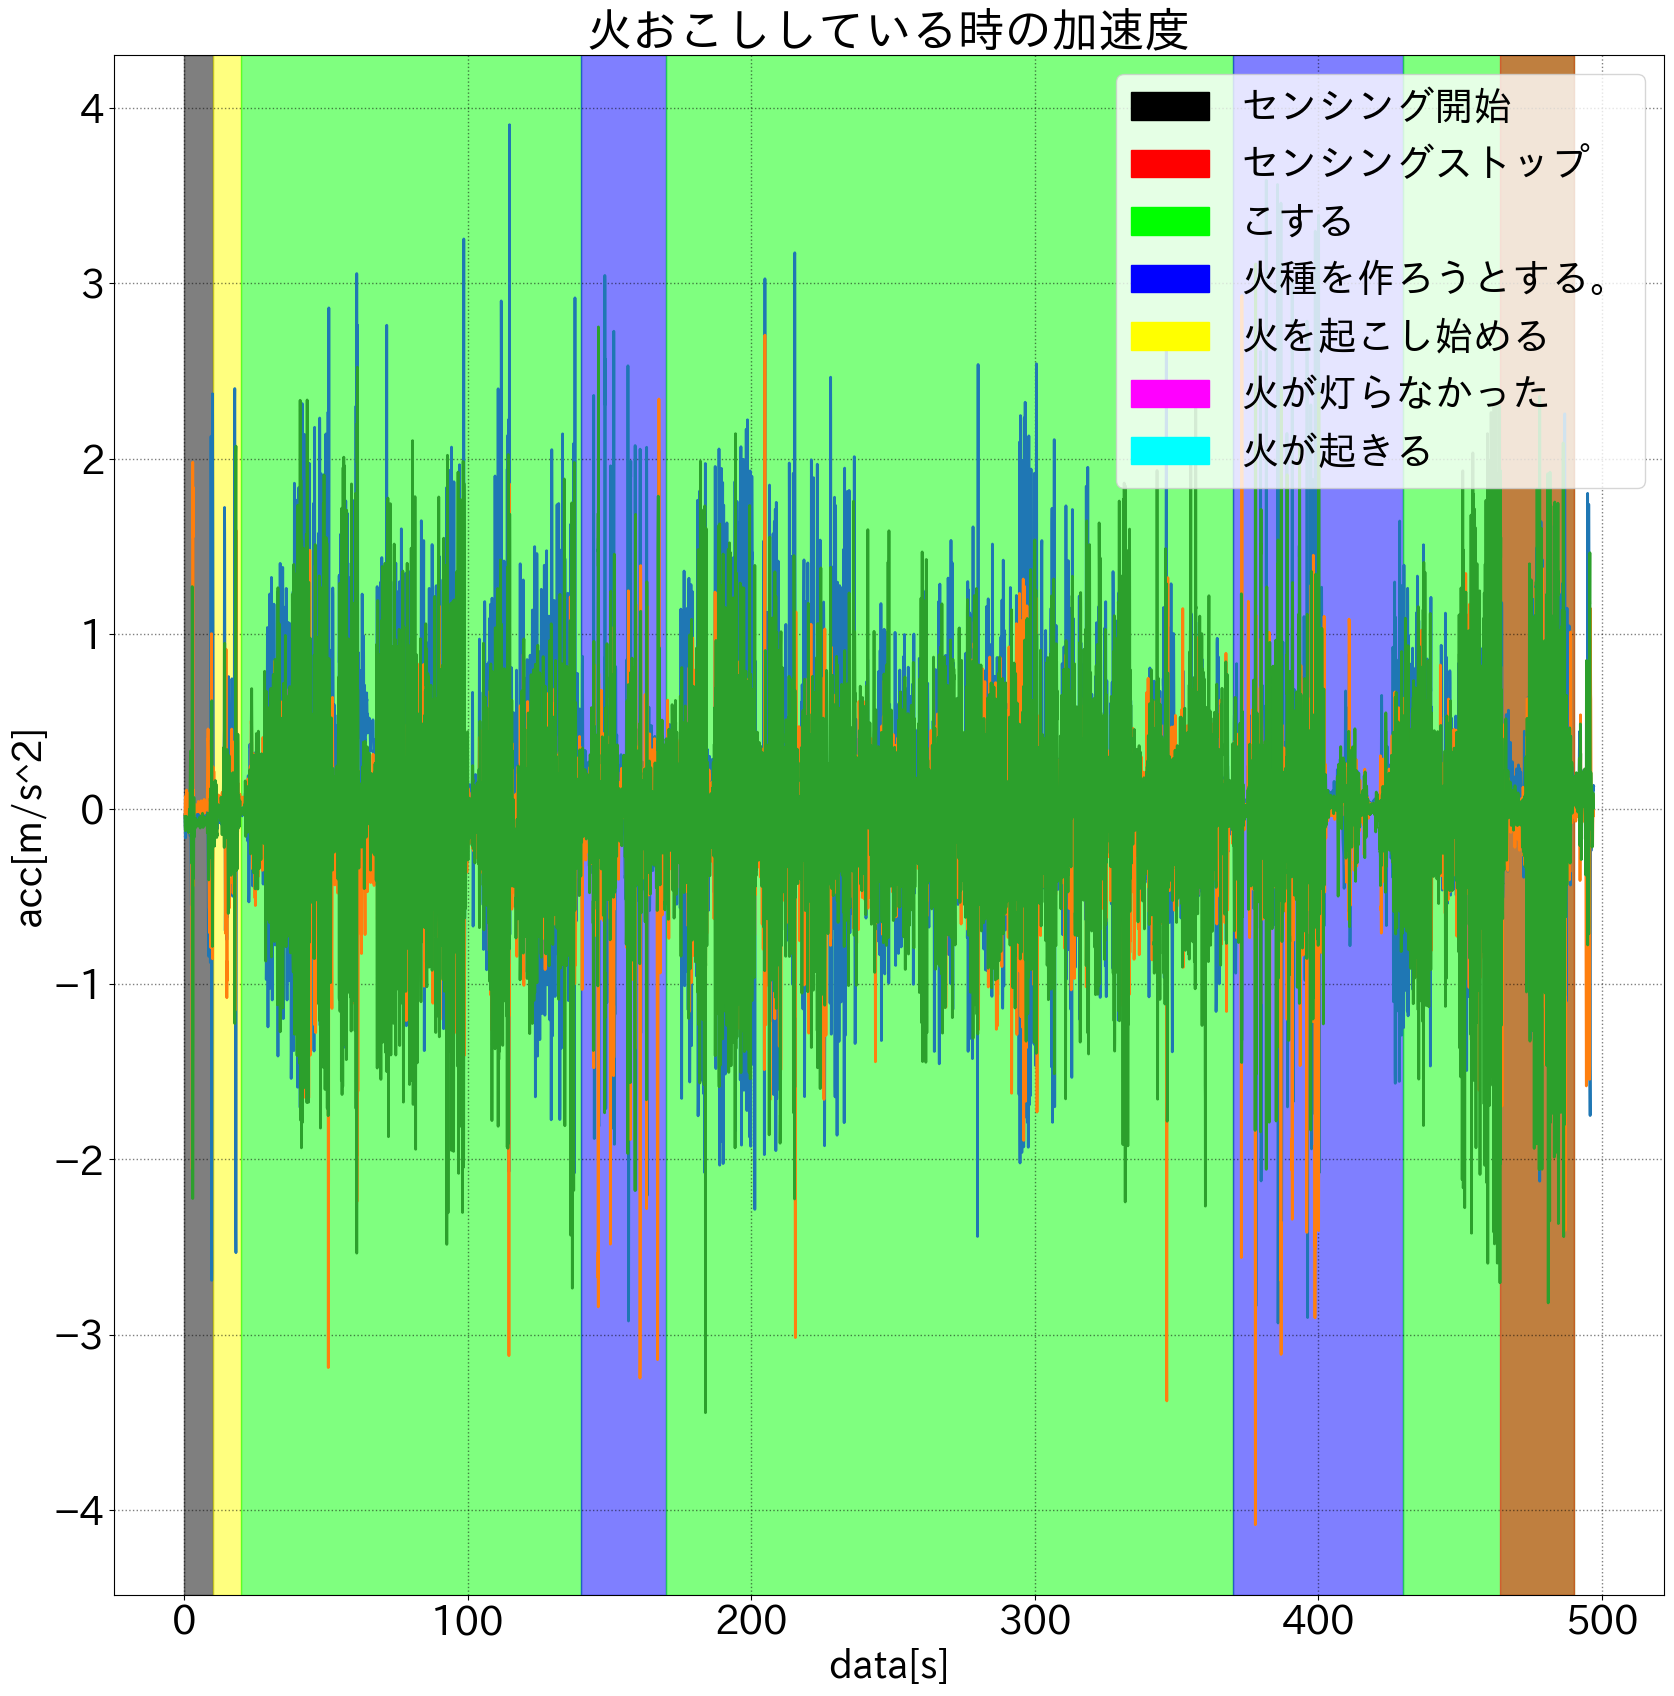

In [31]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("火おこししている時の加速度")
## x軸のラベル
ax3.set_xlabel('data[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["x"].rolling(window=5).mean(),
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["z"].rolling(window=5).mean(),
    label="z軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]) / 1000,
    acc["y"].rolling(window=5).mean(),
    label="y軸",
    linewidth=2,  # 線の太さを指定
)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "センシング開始": "#000000",
    "センシングストップ": "#ff0000",
    "こする": "#00ff00",
    "火種を作ろうとする。": "#0000ff",
    "火を起こし始める": "#ffff00",
    "火が灯らなかった": "#ff00ff",
    "火が起きる": "#00ffff",
}

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0]) / 1000
    end_time = (ans["time"][i + 1] - ans["time"][0]) / 1000 if i < len(ans) - 1 else (acc["time"].max() - ans["time"][0]) / 1000
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

0.024607231882570933
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
12226    0.247888
12227    0.237872
12228    0.229051
12229    0.221799
12230    0.188129
Length: 12231, dtype: float64
[  5201.72283542  14304.7377974   23407.75275938  32510.76772136
  41613.78268335  50716.79764533  59819.81260731  68922.82756929
  78025.84253127  87128.85749325  96231.87245524 105334.88741722
 114437.9023792  123540.91734118 132643.93230316 141746.94726515
 150849.96222713 159952.97718911 169055.99215109 178159.00711307
 187262.02207506 196365.03703704 205468.05199902 214571.066961
 223674.08192298 232777.09688496 241880.11184695 250983.12680893
 260086.14177091 269189.15673289 278292.17169487 287395.18665686
 296498.20161884 305601.21658082 314704.2315428  323807.24650478
 332910.26146676 342013.27642875 351116.29139073 360219.30635271
 369322.32131469 378425.33627667 387528.35123866 396631.36620064
 405734.38116262 414837.3961246  42394

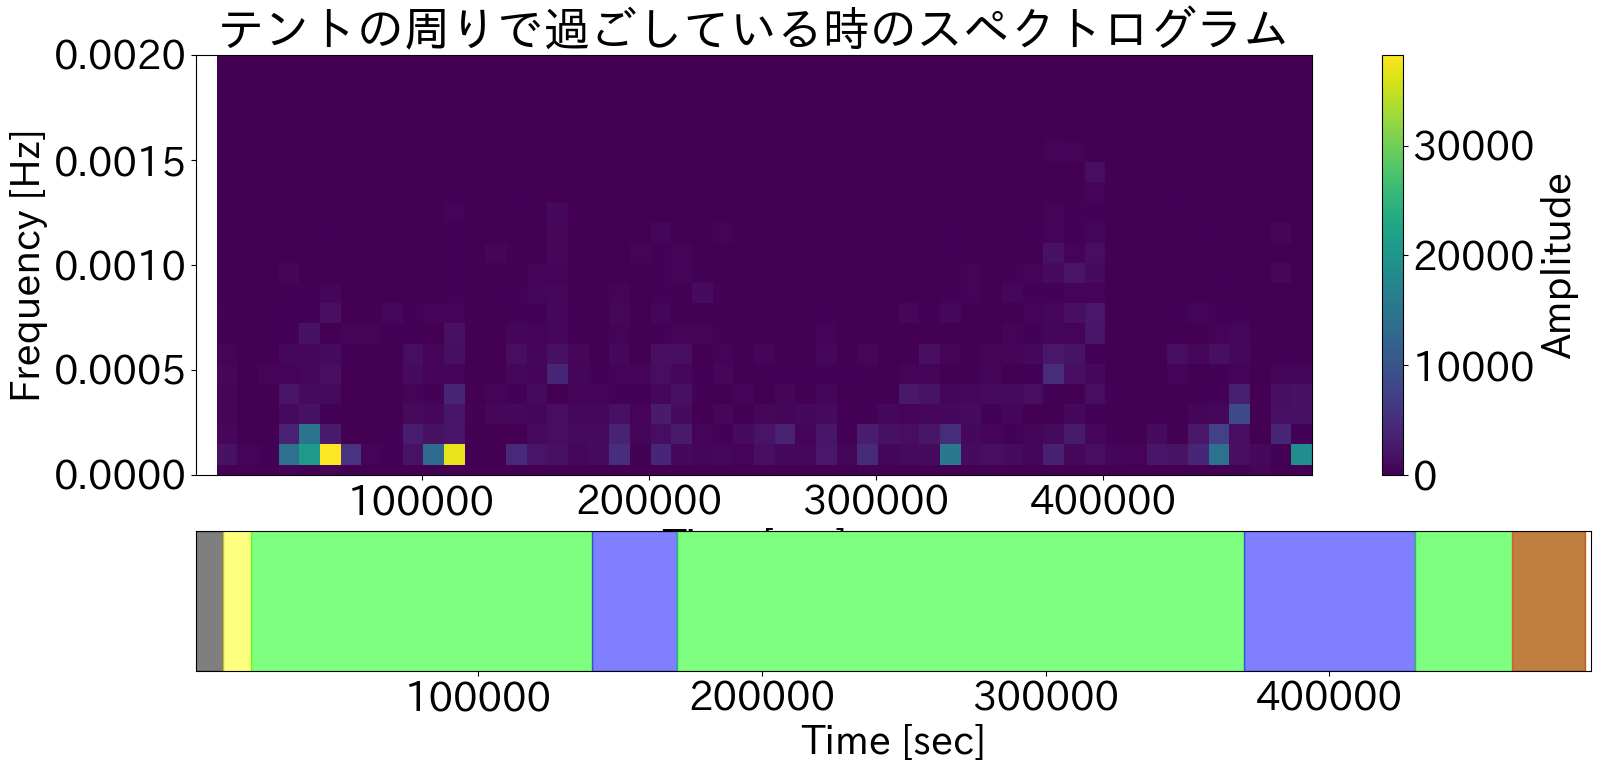

In [32]:
# サンプリング周波数を計算する関数
def calculate_sampling_frequency(data):
    time_stamps = [data_point for data_point in data]
    time_interval = time_stamps[-1] - time_stamps[0]
    sampling_frequency = 1 / (time_interval / len(data))
    return sampling_frequency


# 以下、元のコードからの続き
x = acc["x"]
y = acc["y"]
z = acc["z"]
norm_acc = np.sqrt(x*x + y*y + z*z).rolling(window=10).mean()

fs = calculate_sampling_frequency(acc["time"])
norm = abs(norm_acc)

# スペクトログラム分析の実施
f, t, Sxx = signal.spectrogram(norm, fs)

print(fs)
print(norm)
print(t)

# サブプロットを作成
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# 画像を大きく表示する
fig.set_size_inches(18, 8)

# スペクトログラムをax1に表示
cax = ax1.pcolormesh(t, f, Sxx)
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')
ax1.set_title("テントの周りで過ごしている時のスペクトログラム")

# 縦軸は0.001を最大値にする
ax1.set_ylim(0, 0.002)

cbar1 = fig.colorbar(cax, ax=ax1)
cbar1.set_label("Amplitude")

print(ans)


# 各contentに対応する色の辞書を作成
content_colors = {
    "センシング開始": "#000000",
    "センシングストップ": "#ff0000",
    "こする": "#00ff00",
    "火種を作ろうとする。": "#0000ff",
    "火を起こし始める": "#ffff00",
    "火が灯らなかった": "#ff00ff",
    "火が起きる": "#00ffff",
}

# 正解データをax2に表示
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0])
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0])
    else :
        end_time = (acc["time"].iloc[-1] - ans["time"][0])

    print(start_time, end_time)

    ax2.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

ax2.set_xlabel('Time [sec]')
ax2.set_yticks([])
ax2.set_xlim(ax1.get_xlim())

plt.show()
